# Regression Example

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, make_scorer

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Load Data

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# One-hot encodings of categorical variables  ESTO NO ES UN DUMMY TEST ES HACER UN HOT ENCODING 
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


In [4]:
df.shape

(244, 9)

## Train / Test

In [5]:
X = df.drop('tip', axis=1)
y = df['tip']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

## Cross-validation

In [6]:
# Declare KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [7]:
# Declare scores to be used
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(root_mean_squared_error),
}

## Decision Tree

In [8]:
dt = DecisionTreeRegressor(max_depth=3)
cv_results = cross_validate(dt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train RMSE:', cv_results['train_RMSE'].mean().round(2))
print('Validation RMSE:', cv_results['test_RMSE'].mean().round(2))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(2))
print('Validation MAE:', cv_results['test_MAE'].mean().round(2))

Train RMSE: 0.9
Validation RMSE: 1.1

Train MAE: 0.65
Validation MAE: 0.82


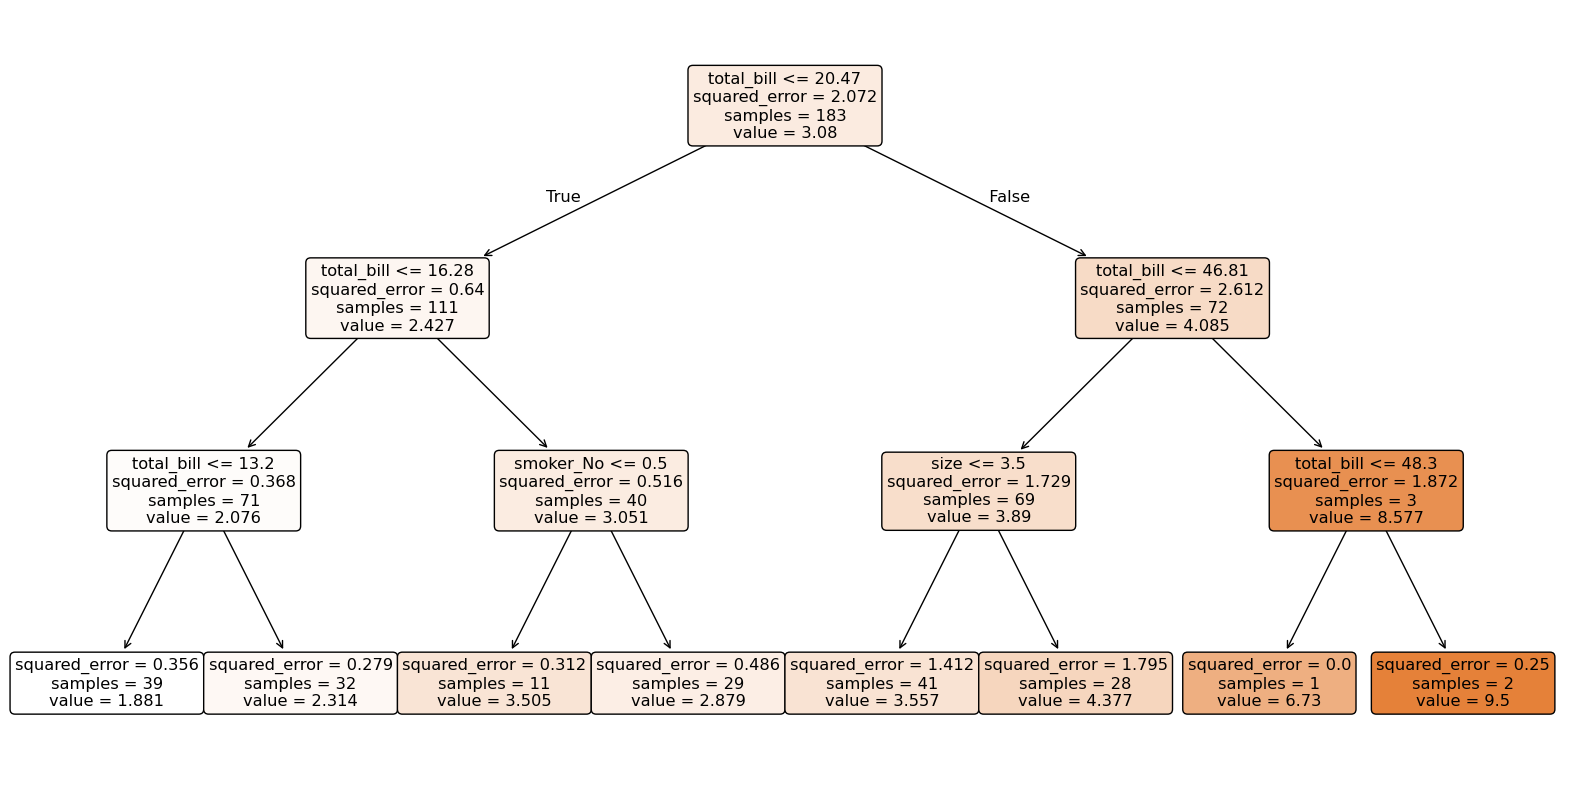

In [9]:
dt.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, rounded=True)
plt.show()

## Random Forest

In [10]:
rf = RandomForestRegressor(100, max_depth=10, n_jobs=-1)
cv_results = cross_validate(rf, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train RMSE:', cv_results['train_RMSE'].mean().round(2))
print('Validation RMSE:', cv_results['test_RMSE'].mean().round(2))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(2))
print('Validation MAE:', cv_results['test_MAE'].mean().round(2))

Train RMSE: 0.42
Validation RMSE: 1.04

Train MAE: 0.31
Validation MAE: 0.77


In [11]:
# Retrain the model on the whole training set
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
feature_importances

,Feature,Importance
0,total_bill,0.793501
3,smoker_No,0.063846
1,size,0.052715
5,day_Sat,0.022950
2,sex_Female,0.021621
6,day_Sun,0.019692
7,time_Dinner,0.017424
4,day_Fri,0.008251


## Gradient Boosting Decision Tree

In [12]:
gbdt = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

cv_results = cross_validate(gbdt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train RMSE:', cv_results['train_RMSE'].mean().round(2))
print('Validation RMSE:', cv_results['test_RMSE'].mean().round(2))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(2))
print('Validation MAE:', cv_results['test_MAE'].mean().round(2))

Train RMSE: 0.42
Validation RMSE: 1.13

Train MAE: 0.32
Validation MAE: 0.81
